In [73]:
Question 1
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import h5py

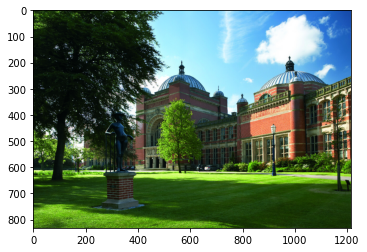

In [74]:
#Reading the image from the computer 
plt.imshow(mpimg.imread('input.jpg'))

In [54]:
#Reading the image and printing the shape
image = cv2.imread("input.jpg")
print(image.shape)

(832, 1214, 3)


(480, 640, 3)


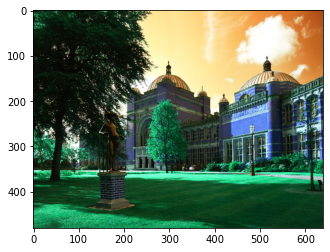

In [55]:
#Resizing of the  image
resizing = cv2.resize(image, (640, 480))
print(resizing.shape)
plt.imshow(resizing)

In [56]:
#Converting BGR to RGB
rgb = cv2.cvtColor(resizing, cv2.COLOR_BGR2RGB)

921600


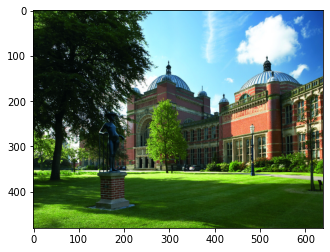

In [57]:
#Displaying  the image as the inline
plt.imshow(rgb)
print(resizing.size)

In [58]:
#Inverting the image
negative = cv2.bitwise_not(rgb)

In [59]:
#Displaying the inverted image and saving it
cv2.imwrite('inverted-output.jpg',negative)

True

In [60]:
#Combining the original image & inverted image and resizing to 1280 x 480

combined = cv2.hconcat([rgb,negative])
cv2.resize(combined, (1280, 480))

array([[[ 27,  51,   5],
        [ 20,  40,   6],
        [ 30,  59,  12],
        ...,
        [232, 182,  92],
        [232, 182,  92],
        [231, 181,  92]],

       [[ 62,  98,  22],
        [ 81, 128,  55],
        [ 25,  53,  11],
        ...,
        [231, 181,  89],
        [231, 181,  91],
        [232, 182,  92]],

       [[ 57,  92,  33],
        [ 41,  72,  22],
        [ 39,  70,  14],
        ...,
        [231, 181,  88],
        [231, 181,  88],
        [232, 182,  92]],

       ...,

       [[ 82, 125,  43],
        [ 69, 107,  26],
        [ 72, 118,  31],
        ...,
        [230, 199, 244],
        [228, 196, 242],
        [223, 189, 233]],

       [[ 73, 117,  28],
        [ 63, 105,  18],
        [ 65, 116,  12],
        ...,
        [226, 195, 237],
        [228, 200, 239],
        [225, 194, 232]],

       [[ 71, 114,  28],
        [ 76, 127,  30],
        [ 68, 122,  12],
        ...,
        [233, 208, 250],
        [232, 209, 248],
        [225, 195, 233]]

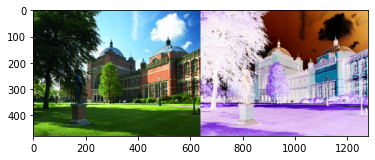

In [61]:
#Displaying the combined image
plt.imshow(combined)

In [62]:
#Saving combined image in hdf5 format
with h5py.File('combined-output.h5','w') as i:
    file = i.create_dataset("data", data = combined)

In [63]:
Question 2

SyntaxError: invalid syntax (<ipython-input-63-9320f7c3866c>, line 1)

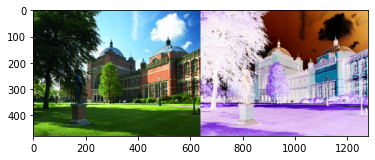

In [64]:
#Reading and displaying the combined image from q2
with h5py.File('combined-output.h5','r') as i:
    dset =np.asarray(i['data']).copy()
plt.imshow(dset)
    

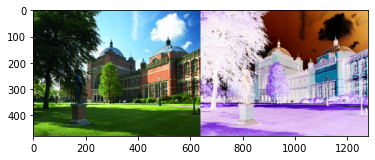

In [65]:
#Displaying the combined image
plt.imshow(dset)

In [66]:
#Printing the image shape
print(dset.shape)

(480, 1280, 3)


In [67]:
singlechannelimage=dset.mean(axis=2)

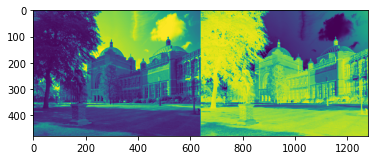

In [68]:
plt.imshow(singlechannelimage)

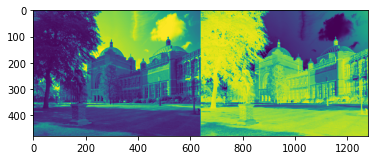

In [69]:
#Making the image single channelled and displaying it
Single_Channel = dset.mean(axis=2)
plt.imshow(Single_Channel)

In [70]:
#Defining the kernel sets
k1 = (1,3)
k2 = (3,5)
k3 = (5,7)

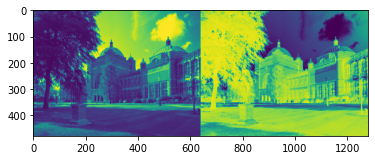

In [71]:
#Gaussian thefiltering using the k1
Gauss_Filter1 = cv2.GaussianBlur(Single_Channel,k1,cv2.BORDER_DEFAULT)
plt.imshow(Gauss_Filter1)

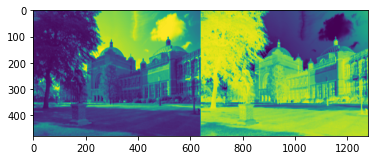

In [72]:
#Gaussian the filtering using k2
Gauss_Filter2 = cv2.GaussianBlur(Single_Channel,k2,cv2.BORDER_DEFAULT)
plt.imshow(Gauss_Filter2)

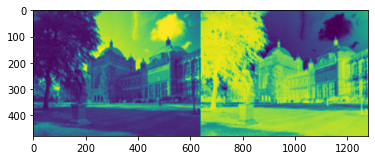

In [21]:
#Gaussian the filtering using k3
Gauss_Filter3 = cv2.GaussianBlur(Single_Channel,k3,cv2.BORDER_DEFAULT)
plt.imshow(Gauss_Filter3)

In [22]:
#Subtracting the k1 from k2
sub1 = Gauss_Filter2-Gauss_Filter1
#plt.imshow(sub1)

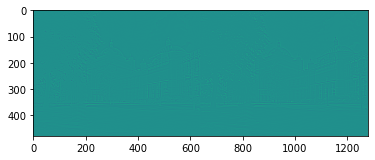

In [23]:
#Normalising the image and displaying (k2-k1)
normal1 = np.zeros((800,800))
final1 = cv2.normalize(sub1,normal1,0,1,cv2.NORM_MINMAX)
plt.imshow(final1)

In [24]:
#Storing k1=1, k2=3
with h5py.File('filtered-1-3.h5','w') as i:
    file = i.create_dataset("data", data = final1)

In [25]:
#Subtracting k2 from k3
sub2 = (Gauss_Filter3-Gauss_Filter2)
#plt.imshow(sub2)

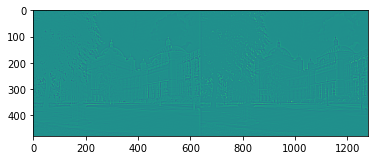

In [26]:
#Normalising the image and displaying (k3-k2)
normal2 = np.zeros((800,800))
final2 = cv2.normalize(sub2,normal2,0,1,cv2.NORM_MINMAX)
plt.imshow(final2)

In [27]:
#Storing k1=3, k2=5
with h5py.File('filtered-3-5.h5','w') as i:
    file = i.create_dataset("data", data = final2)

In [28]:
#Subtracting k1 from k3
sub3 = (Gauss_Filter3-Gauss_Filter1)
#plt.imshow(sub3)

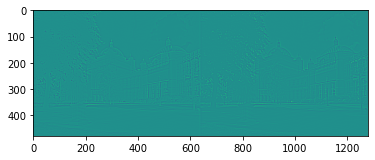

In [29]:
#Normalising the image and displaying (k3-k1)
normal3 = np.zeros((800,800))
final3 = cv2.normalize(sub3,normal3,0,1,cv2.NORM_MINMAX)
plt.imshow(final3)

In [30]:
#Storing k1=1, k2=5
with h5py.File('filtered-1-5.h5','w') as i:
    file = i.create_dataset("data", data = final3)

Text(0.5, 1.0, 'k3-k1')

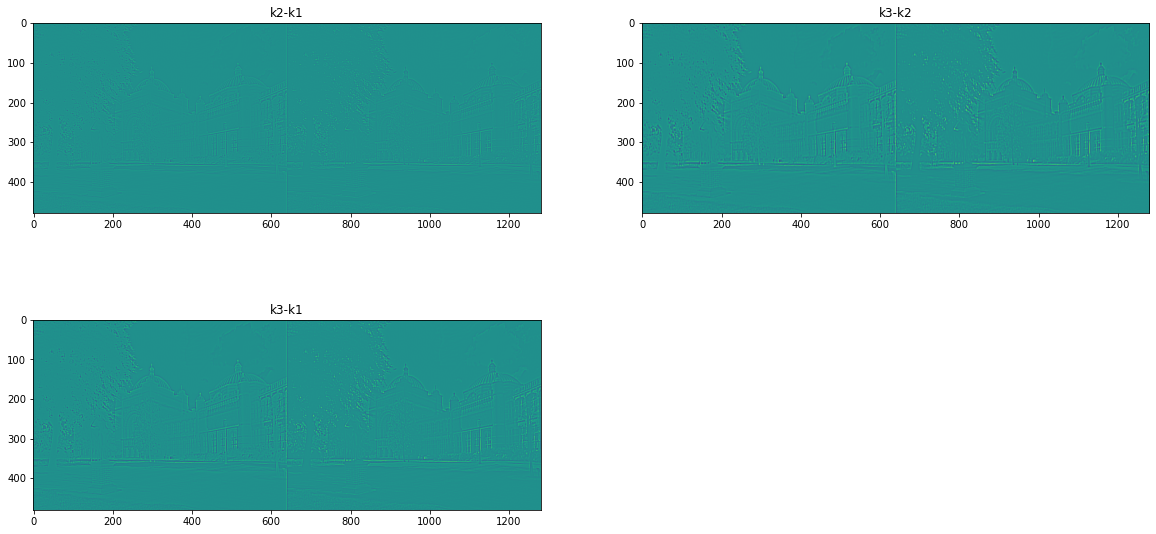

In [31]:
#Plotting subplot for all 3 filtered images
pic = plt.figure(figsize=(20, 10))

pic.add_subplot(2, 2, 1)
plt.imshow(final1)
plt.title("k2-k1")
pic.add_subplot(2, 2, 2)
plt.imshow(final2)
plt.title("k3-k2")
pic.add_subplot(2, 2, 3)
plt.imshow(final3)
plt.title("k3-k1")

In [ ]:
Question 3

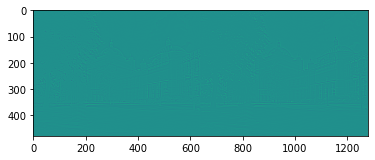

In [48]:
#Reading filtered image of k2-k1 and displaying it
with h5py.File('filtered-1-3.h5','r') as i:
  fil1 = np.asarray(i['data']).copy()
plt.imshow(fil1)

In [33]:
#Performing the threshold for k2-k1 filtered image 
r, threshold1 = cv2.threshold(fil1,0.51,255,cv2.THRESH_BINARY)

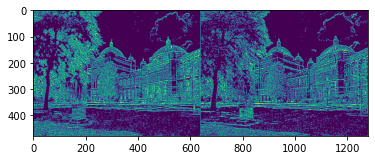

In [34]:
#Displaying the threshold image for k2-k1
plt.imshow(threshold1)

In [49]:
#Saving the thresholded image of k2-k1
with h5py.File(' The thresholded-1-3.h5','w') as i:
    file = i.create_dataset("data", data = final1)

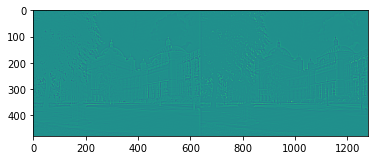

In [51]:
#Reading The filtered image of k3-k2 and displaying it
with h5py.File('filtered-3-5.h5','r') as i:
  fil2 = np.asarray(i['data']).copy()
plt.imshow(fil2)

In [37]:
#Performing the threshold for k3-k2 filtered image 
r, threshold2 = cv2.threshold(fil1,0.51,255,cv2.THRESH_BINARY)

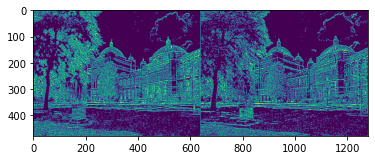

In [38]:
#Displaying the threshold image for k3-k2
plt.imshow(threshold2)

In [39]:
#Saving the thresholded image of k3-k2
with h5py.File('thresholded-3-5.h5','w') as i:
    file = i.create_dataset("data", data = final1)

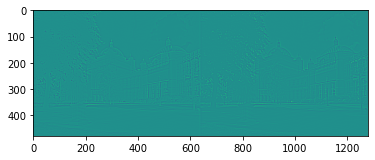

In [40]:
#Reading filtered image of k3-k1 and displaying it
with h5py.File('filtered-1-5.h5','r') as i:
  fil3 = np.asarray(i['data']).copy()
plt.imshow(fil3)

In [41]:
#Performing the threshold for k3-k1 filtered image 
r, threshold3 = cv2.threshold(fil1,0.51,255,cv2.THRESH_BINARY)

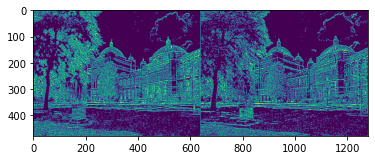

In [42]:
#Displaying the threshold image for k3-k1
plt.imshow(threshold3)

In [45]:
#Saving the thresholded image of k3-k1
with h5py.File(' The thresholded-1-5.h5','w') as i:
    file = i.create_dataset("data", data = final1)

Text(0.5, 1.0, ' The Third Thresholded Image')

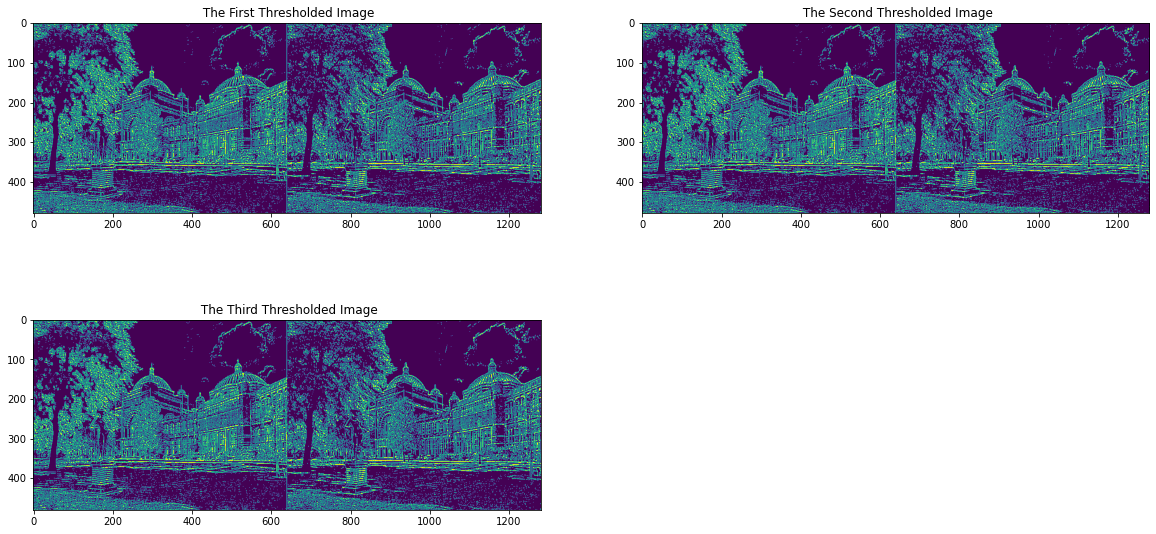

In [75]:
#Plotting subplot for all 3 thresholded images
sub2 = plt.figure(figsize=(20, 10))

sub2.add_subplot(2, 2, 1)
plt.imshow(threshold1)
plt.title(" The First Thresholded Image")
sub2.add_subplot(2, 2, 2)
plt.imshow(threshold2)
plt.title(" The Second Thresholded Image")
sub2.add_subplot(2, 2, 3)
plt.imshow(threshold3)
plt.title(" The Third Thresholded Image")